# Hotel Beds Clusters
# Team D 01

In [1]:
import plotly as py
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
from datetime import datetime
from pandas.tools.plotting import scatter_matrix
from sklearn_pandas import DataFrameMapper, cross_val_score
from sklearn import preprocessing
import sklearn.decomposition
from sklearn.cluster import k_means, KMeans, MeanShift
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist

# Activities

Step 1: Read the files with the data created by the exploratory analysis. During exporting the dataset was split into two files, so they are read separately and appended to one another.

In [2]:
activities = pd.read_csv("c:/Users/ceayl/OneDrive/Documents/Term 3/Team D HotelBeds Datathon/activities_data/act_part1.csv", sep="|")
activities.head()

,client,Avg_Children,Avg_Pct_Comm,Avg_Adults,DateDiff,Total_Bookings,Total_Income,cancellations,countries,Booking_Freq,avg_price,age,days_since_last_booking,requests
0,100056,0.000000,10.000000,2.000000,31.000000,1,55,0,1,1.000000,55.000000,1418,1418,41.0
1,100094,0.166667,14.722222,2.444444,62.277778,18,2536,3,5,2.571429,140.888889,3669,563,3031.0
2,100108,0.230769,14.000000,2.846154,26.461538,10,2809,3,5,1.625000,280.900000,3612,1645,844.0
3,100110,0.338843,14.000000,2.049587,36.975207,86,15504,33,10,4.840000,180.279070,3558,981,3951.0
4,10015,0.461538,0.000000,2.343195,98.994083,144,45183,23,5,5.827586,313.770833,3192,2453,4875.0


In [3]:
activities2 = pd.read_csv("c:/Users/ceayl/OneDrive/Documents/Term 3/Team D HotelBeds Datathon/activities_data/act_part2.csv", sep="|")
activities2.head()

,client,Avg_Children,Avg_Pct_Comm,Avg_Adults,DateDiff,Total_Bookings,Total_Income,cancellations,countries,Booking_Freq,avg_price,age,days_since_last_booking,requests
0,10010,0.162791,11.860465,2.488372,16.000000,43,5735,8,9,2.687500,133.372093,3209,756,705.0
1,100192,0.714286,11.980952,2.266667,33.847619,99,8994,26,8,4.565217,90.848485,1497,744,1484.0
2,100193,0.250000,14.000000,2.194444,45.138889,29,3974,15,5,4.000000,137.034483,3634,696,836.0
3,10023,0.445993,0.000000,2.947735,41.480836,227,90003,48,15,10.629630,396.488987,3158,634,9140.0
4,100238,0.000000,14.000000,2.000000,23.000000,1,620,0,1,1.000000,620.000000,1488,1086,900.0


In [4]:
df= activities.append(activities2)

In [5]:
df.describe()

,client,Avg_Children,Avg_Pct_Comm,Avg_Adults,DateDiff,Total_Bookings,Total_Income,cancellations,countries,Booking_Freq,avg_price,age,days_since_last_booking,requests
count,15518.000000,15518.000000,15518.00000,15518.000000,15518.000000,15518.000000,1.551800e+04,15518.000000,15518.000000,15518.000000,15518.000000,15518.000000,15518.000000,1.542300e+04
mean,75744.628109,0.419329,9.25943,2.617079,43.521624,25.436268,5.192979e+03,5.749710,4.146604,2.739453,173.523910,2310.558899,1000.168707,1.945190e+04
std,53322.857078,0.591541,5.50294,1.212054,37.703551,124.530327,3.191335e+04,23.053557,4.481676,5.904258,187.254560,1278.341767,654.524916,2.055524e+06
min,9.000000,0.000000,0.00000,0.777778,0.000000,1.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000,486.000000,486.000000,1.000000e+00
25%,32894.500000,0.000000,7.50000,2.000000,19.100000,2.000000,2.012500e+02,0.000000,1.000000,1.000000,74.807174,1236.000000,611.000000,1.670000e+02
50%,62157.500000,0.219512,11.96000,2.315789,33.800000,6.000000,8.760000e+02,1.000000,3.000000,2.000000,130.916084,1955.000000,781.000000,4.470000e+02
75%,116074.000000,0.615071,13.00000,2.888889,56.182292,19.000000,3.085000e+03,5.000000,5.000000,2.888889,211.175210,3307.750000,1122.000000,1.055500e+03
max,212610.000000,7.187500,20.00000,23.000000,374.000000,6326.000000,1.181440e+06,1128.000000,57.000000,262.000000,2513.000000,5433.000000,5210.000000,2.551023e+08


In [6]:
df.dtypes

client                       int64
Avg_Children               float64
Avg_Pct_Comm               float64
Avg_Adults                 float64
DateDiff                   float64
Total_Bookings               int64
Total_Income                 int64
cancellations                int64
countries                    int64
Booking_Freq               float64
avg_price                  float64
age                          int64
days_since_last_booking      int64
requests                   float64
dtype: object

Exploratory Analysis to set the thresholds

In [7]:
df[df.Total_Bookings>30].count()

client                     2560
Avg_Children               2560
Avg_Pct_Comm               2560
Avg_Adults                 2560
DateDiff                   2560
Total_Bookings             2560
Total_Income               2560
cancellations              2560
countries                  2560
Booking_Freq               2560
avg_price                  2560
age                        2560
days_since_last_booking    2560
requests                   2554
dtype: int64

In [8]:
df[df.days_since_last_booking>365].count()

client                     15518
Avg_Children               15518
Avg_Pct_Comm               15518
Avg_Adults                 15518
DateDiff                   15518
Total_Bookings             15518
Total_Income               15518
cancellations              15518
countries                  15518
Booking_Freq               15518
avg_price                  15518
age                        15518
days_since_last_booking    15518
requests                   15423
dtype: int64

In [9]:
df= activities.append(activities2)
df['conversion_rate'] = df['Total_Bookings'] / df['requests']
df[df.conversion_rate>1].count()

client                     17
Avg_Children               17
Avg_Pct_Comm               17
Avg_Adults                 17
DateDiff                   17
Total_Bookings             17
Total_Income               17
cancellations              17
countries                  17
Booking_Freq               17
avg_price                  17
age                        17
days_since_last_booking    17
requests                   17
conversion_rate            17
dtype: int64

Step two: the features are transformed in order to allow for better clusters and NA's are filled

In [10]:
df= activities.append(activities2)
df= df[df['Total_Bookings'] >30]
df['days_since_last_booking'] = df['days_since_last_booking'] -486
df=df[df.days_since_last_booking<=365]
df['Total_Income'] = df['Total_Income'] / df['age']
df['cancellations'] = df['cancellations'] / df['Total_Bookings']
df['conversion_rate'] = df['Total_Bookings'] / df['requests']
df= df[df['avg_price'] < 600]
df= df[df['Booking_Freq'] < 26]
df= df[df['conversion_rate'] <= 1]
df=df.fillna(df.mean())
df.drop(df.columns[[0,1,2,3,4,5,6,8,11,13]], axis=1, inplace=True)

In [11]:
df.count()

cancellations              1611
Booking_Freq               1611
avg_price                  1611
days_since_last_booking    1611
conversion_rate            1611
dtype: int64

In [12]:
df.describe()

,cancellations,Booking_Freq,avg_price,days_since_last_booking,conversion_rate
count,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000
mean,0.264451,5.189646,173.818727,106.960273,0.037498
std,0.157114,3.823127,97.589406,97.235820,0.036491
min,0.000000,1.777778,0.000000,0.000000,0.000075
25%,0.159091,2.954451,112.007914,24.000000,0.019085
50%,0.238095,3.920000,149.766038,76.000000,0.030545
75%,0.334167,5.714286,206.402304,173.500000,0.045793
max,1.000000,25.851852,599.636364,364.000000,0.595855


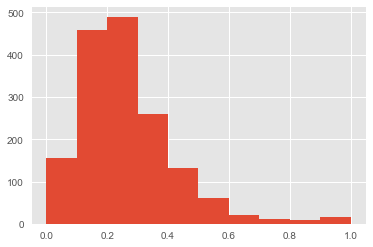

In [14]:
df.cancellations.hist()

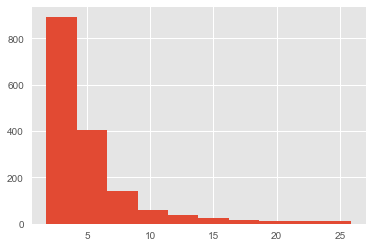

In [15]:
df.Booking_Freq.hist()

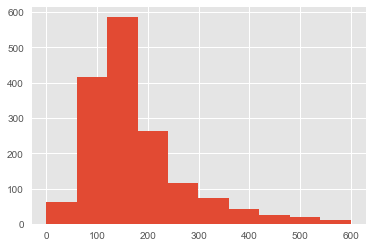

In [16]:
df.avg_price.hist()

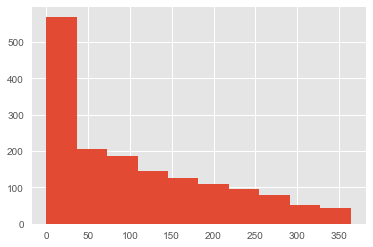

In [17]:
df.days_since_last_booking.hist()

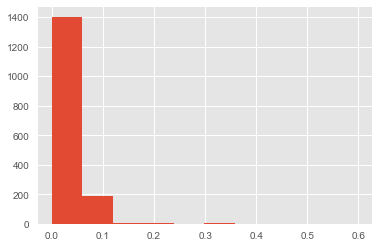

In [18]:
df.conversion_rate.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000199D181B048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000199D2153E48>]], dtype=object)

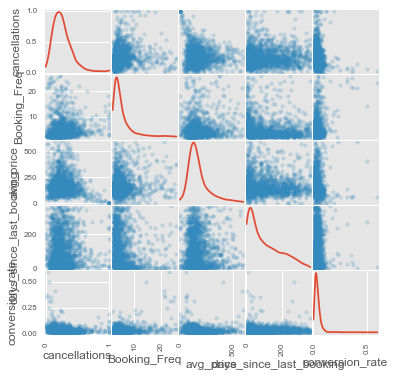

In [19]:
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

Data is Normalized before clustered

In [20]:
normalized_act = preprocessing.normalize(df)
normalized_act = pd.DataFrame(normalized_act)

normalized_act.describe()

,0,1,2,3,4
count,1611.000000,1611.000000,1611.000000,1611.000000,1.611000e+03
mean,0.001720,0.031322,0.799260,0.452904,2.420801e-04
std,0.003749,0.048153,0.226447,0.318689,5.223149e-04
min,0.000000,0.004047,0.000000,0.000000,5.860587e-07
25%,0.000691,0.013211,0.643548,0.139083,8.232446e-05
50%,0.001096,0.020039,0.899896,0.434374,1.413778e-04
75%,0.001783,0.033242,0.988568,0.762124,2.603886e-04
max,0.077252,0.994537,0.999951,0.999954,9.655289e-03


# #Activities Clusters

Clusters are created with the newly transformed variables. 

In [21]:
K = range(1,10)

# scipy.cluster.vq.kmeans
k_clusters = [kmeans(normalized_act.values,k) for k in K] # apply kmeans 1 to 10
k_clusters[:3]

[(array([[  1.71998187e-03,   3.13222725e-02,   7.99259825e-01,
            4.52903984e-01,   2.42080107e-04]]), 0.35273176179690607),
 (array([[  1.74250410e-03,   2.65031154e-02,   5.81048913e-01,
            7.81258649e-01,   2.32094701e-04],
         [  1.70310855e-03,   3.49327159e-02,   9.62740313e-01,
            2.06905375e-01,   2.49561030e-04]]), 0.16394438561133326),
 (array([[  1.58076464e-03,   2.98110386e-02,   8.64168037e-01,
            4.84601360e-01,   2.36607515e-04],
         [  1.74456993e-03,   3.67033983e-02,   9.86799450e-01,
            1.17644662e-01,   2.52545364e-04],
         [  1.80970854e-03,   2.60041197e-02,   5.12586722e-01,
            8.38065412e-01,   2.33920729e-04]]), 0.11312111012324114)]

In [22]:
euclidean_centroid = [cdist(normalized_act.values, centroid, 'euclidean') for (centroid,var) in k_clusters]
print ('-----with 1 cluster------')
print (euclidean_centroid[0][:5])

print ('-----with 2 cluster------')
print (euclidean_centroid[1][:5])

-----with 1 cluster------
[[ 0.28504007]
 [ 0.4395677 ]
 [ 0.36978459]
 [ 0.43933332]
 [ 0.08209758]]
-----with 2 cluster------
[[ 0.67871459  0.02687376]
 [ 0.83214886  0.15135053]
 [ 0.76377974  0.0765496 ]
 [ 0.83201039  0.1507292 ]
 [ 0.39599557  0.31309344]]


In [23]:
distance = [np.min(D,axis=1) for D in euclidean_centroid]
print ('-----with 1st cluster------')
print (distance[0][:5])
print ('-----with 2nd cluster------')
print (distance[1][:5])

-----with 1st cluster------
[ 0.28504007  0.4395677   0.36978459  0.43933332  0.08209758]
-----with 2nd cluster------
[ 0.02687376  0.15135053  0.0765496   0.1507292   0.31309344]


In [24]:
avgWithinSumSquare = [sum(d)/normalized_act.values.shape[0] for d in distance]
avgWithinSumSquare

[0.35273176179690618,
 0.16438266945373428,
 0.11330710353230841,
 0.088683997574336634,
 0.074414475498202251,
 0.064624237538768503,
 0.056837962873710034,
 0.052370307198291971,
 0.049053608863399364]

We used an elbow curve to start our clustering analysis. It indicated that the most idea amount of clusters were 3, so we started with 3 clusters. After playing around with the different clusters and variables we found that 3 clusters were in fact producing the best results.

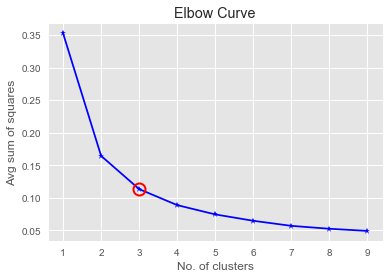

In [25]:
point_id = 2
# plot elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSumSquare, 'b*-')
ax.plot(K[point_id], avgWithinSumSquare[point_id], marker='o', markersize=12, 
      markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('No. of clusters')
plt.ylabel('Avg sum of squares')
tt = plt.title('Elbow Curve')

3 Clusters

In [26]:
km = KMeans(3, init='k-means++', random_state = 3425) # initialize
km.fit(normalized_act.values)
df['clientSegment'] = km.predict(normalized_act.values)
df[:5]

,cancellations,Booking_Freq,avg_price,days_since_last_booking,conversion_rate,clientSegment
19,0.048780,2.562500,115.512195,27,0.034746,2
20,0.180556,4.111111,293.402778,18,0.089664,2
25,0.086957,2.421053,101.630435,14,0.040780,2
27,0.145833,3.310345,179.135417,11,0.111888,2
36,0.292308,3.200000,108.000000,63,0.042208,0


In [27]:
df.groupby('clientSegment').count()

,cancellations,Booking_Freq,avg_price,days_since_last_booking,conversion_rate
clientSegment,,,,,
0,450,450,450,450,450
1,476,476,476,476,476
2,685,685,685,685,685


In [28]:
clust_map = {
    0:'A',
    1:'B',
    2:'C',
}

df.clientSegment = df.clientSegment.map(clust_map)
df[:10]

,cancellations,Booking_Freq,avg_price,days_since_last_booking,conversion_rate,clientSegment
19,0.048780,2.562500,115.512195,27,0.034746,C
20,0.180556,4.111111,293.402778,18,0.089664,C
25,0.086957,2.421053,101.630435,14,0.040780,C
27,0.145833,3.310345,179.135417,11,0.111888,C
36,0.292308,3.200000,108.000000,63,0.042208,A
43,0.389831,5.083333,157.711864,238,0.040859,B
60,0.645161,4.400000,47.258065,5,0.006251,C
76,0.227273,3.066667,137.477273,228,0.040073,B
92,0.363636,5.166667,159.022727,77,0.014143,A
100,0.117021,4.000000,120.617021,186,0.051563,B


In [29]:
df.groupby('clientSegment').describe()

Booking_Freq   avg_price  cancellations  conversion_rate  \
clientSegment                                                                   
A             count    450.000000  450.000000     450.000000       450.000000   
              mean       4.892116  179.732664       0.260093         0.036775   
              std        3.686601   91.066709       0.144776         0.035703   
              min        1.789474   19.735294       0.013699         0.000169   
              25%        2.950595  119.334359       0.161290         0.018799   
              50%        3.792857  158.114736       0.238038         0.031586   
              75%        5.079231  221.725446       0.327766         0.045259   
              max       25.633333  567.047619       0.911765         0.500664   
B             count    476.000000  476.000000     476.000000       476.000000   
              mean       4.738651  124.202439       0.282347         0.040391   
              std        3.388509   52.015129       0.188963         0.034039   
              min        1.833333    0.000000       0.000000         0.000075   
              25%        2.807143   93.186335       0.159773         0.022061   
              50%        3.624339  121.550802       0.241582         0.033268   
              75%        5.275974  152.786638       0.354532         0.049375   
              max       24.000000  346.840909       1.000000         0.351351   
C             count    685.000000  685.000000     685.000000       685.000000   
              mean       5.698497  204.411547       0.254878         0.035964   
              std        4.129114  111.447972       0.138638         0.038528   
              min        1.777778    1.214286       0.000000         0.000241   
              25%        3.076923  128.161290       0.155844         0.017644   
              50%        4.200000  170.913793       0.236994         0.028187   
              75%        6.578947  260.177419       0.325843         0.042067   
              max       25.851852  599.636364       1.000000         0.595855   

                     days_since_last_booking  
clientSegment                                 
A             count               450.000000  
              mean                112.873333  
              std                  62.830308  
              min                  13.000000  
              25%                  70.250000  
              50%                 102.000000  
              75%                 141.000000  
              max                 354.000000  
B             count               476.000000  
              mean                217.739496  
              std                  74.866473  
              min                   7.000000  
              25%                 166.000000  
              50%                 220.000000  
              75%                 271.000000  
              max                 364.000000  
C             count               685.000000  
              mean                 26.096350  
              std                  25.676566  
              min                   0.000000  
              25%                   8.000000  
              50%                  19.000000  
              75%                  34.000000  
              max                 175.000000

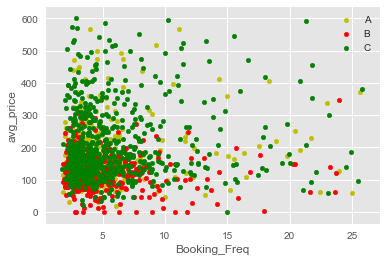

In [30]:
d_color = {
    'A':'y',
    'B':'r',
    'C':'g',
}

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.clientSegment == clust].plot(kind='scatter', x='Booking_Freq', y='avg_price', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

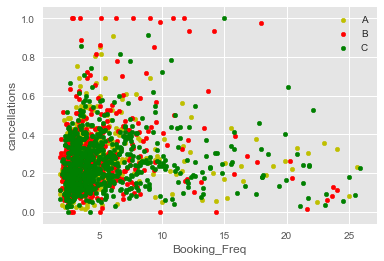

In [31]:
d_color = {
    'A':'y',
    'B':'r',
    'C':'g',
}

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.clientSegment == clust].plot(kind='scatter', x='Booking_Freq', y='cancellations', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

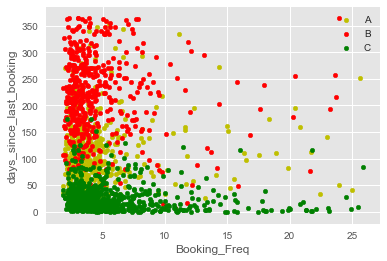

In [32]:
d_color = {
    'A':'y',
    'B':'r',
    'C':'g',
}

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.clientSegment == clust].plot(kind='scatter', x='Booking_Freq', y='days_since_last_booking', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

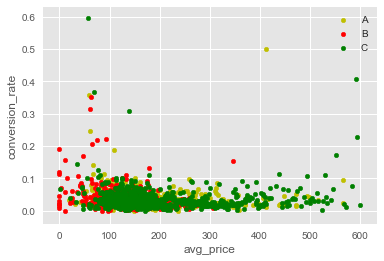

In [33]:
d_color = {
    'A':'y',
    'B':'r',
    'C':'g',
}

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.clientSegment == clust].plot(kind='scatter', x='avg_price', y='conversion_rate', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

clientSegment
A    [[Axes(0.125,0.670278;0.336957x0.209722), Axes...
B    [[Axes(0.125,0.670278;0.336957x0.209722), Axes...
C    [[Axes(0.125,0.670278;0.336957x0.209722), Axes...
dtype: object

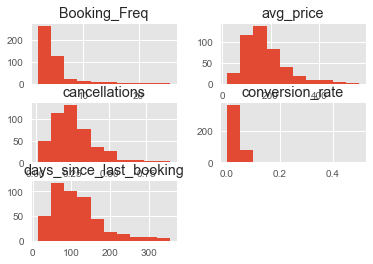

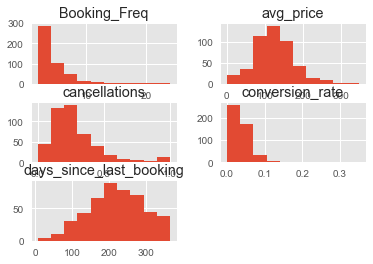

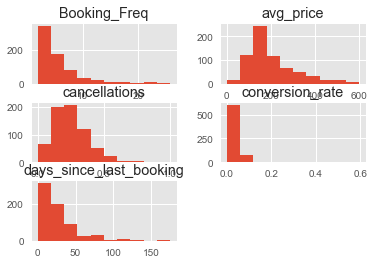

In [34]:
df.groupby('clientSegment').hist()

# Transfers

As we did with activities, we read the new Transfers Data and combine the two csv files to create a complete dataset.

In [35]:
transfers = pd.read_csv("c:/Users/ceayl/OneDrive/Documents/Term 3/Team D HotelBeds Datathon/transfers_data/tf_part1.csv", sep="|")

transfers.head()

,client,Avg_Children,Avg_Pct_Comm,Avg_Adults,DateDiff,Total_Bookings,Total_Income,cancellations,countries,Booking_Freq,avg_price,age,days_since_last_booking,requests
0,100094,0.130435,14.973913,2.269565,52.739130,67,3112,20,14,4.791667,46.447761,3669,563,3284.0
1,100108,0.222222,14.000000,3.027778,33.361111,22,1945,8,6,3.000000,88.409091,3612,1645,710.0
2,100110,0.394737,14.000000,2.424812,42.710526,143,7312,41,15,9.500000,51.132867,3558,981,4614.0
3,100129,0.000000,12.000000,2.000000,10.000000,1,118,0,1,2.000000,118.000000,3665,1899,64.0
4,10015,0.400000,2.703797,2.536709,150.496203,233,21009,44,17,13.166667,90.167382,3192,2453,6684.0


In [36]:
transfers2 = pd.read_csv("c:/Users/ceayl/OneDrive/Documents/Term 3/Team D HotelBeds Datathon/transfers_data/tf_part2.csv", sep="|")
transfers2.head()

,client,Avg_Children,Avg_Pct_Comm,Avg_Adults,DateDiff,Total_Bookings,Total_Income,cancellations,countries,Booking_Freq,avg_price,age,days_since_last_booking,requests
0,10010,0.432432,11.027027,2.351351,20.459459,23,2089,4,11,2.466667,90.826087,3209,756,239.0
1,100148,0.000000,10.000000,6.588235,131.117647,13,76,12,5,3.400000,5.846154,2885,1471,697.0
2,100192,0.258824,11.858824,2.717647,48.082353,50,2878,11,13,4.047619,57.560000,1497,744,1375.0
3,100193,0.302326,14.000000,3.372093,45.023256,25,1754,9,11,4.300000,70.160000,3634,696,693.0
4,10023,0.226913,12.627968,2.461741,38.353562,197,8372,62,14,54.142857,42.497462,3158,634,19806.0


In [37]:
df2= transfers.append(transfers2)

In [38]:
df2.describe()

,client,Avg_Children,Avg_Pct_Comm,Avg_Adults,DateDiff,Total_Bookings,Total_Income,cancellations,countries,Booking_Freq,avg_price,age,days_since_last_booking,requests
count,17922.000000,17922.000000,17922.000000,17922.000000,17922.000000,17922.000000,17922.000000,17922.000000,17922.00000,17922.000000,17922.000000,17922.000000,17922.000000,1.771500e+04
mean,76650.094632,0.301972,10.891799,2.652544,51.698434,40.878473,2495.700591,9.194286,6.32223,4.936220,63.124986,2253.435777,1015.042183,1.085206e+04
std,54245.410868,0.473673,4.089848,1.125852,38.341019,264.136304,15863.181136,48.191250,7.71100,16.885361,48.085946,1252.167106,656.179476,6.094233e+05
min,9.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.00000,1.000000,0.000000,486.000000,486.000000,1.000000e+00
25%,34390.250000,0.000000,10.000000,2.000000,25.500000,2.000000,118.000000,1.000000,1.00000,2.000000,36.000000,1236.000000,612.000000,1.530000e+02
50%,62867.000000,0.153846,12.000000,2.411765,43.537523,8.000000,476.000000,2.000000,3.00000,2.900000,58.195238,1926.000000,790.500000,4.590000e+02
75%,115974.500000,0.413232,13.529412,2.980392,67.493421,27.000000,1713.000000,7.000000,8.00000,4.250000,81.775641,3161.000000,1145.000000,1.230000e+03
max,214806.000000,12.000000,25.000000,15.000000,457.000000,12462.000000,895227.000000,2143.000000,96.00000,745.500000,1274.000000,5419.000000,5210.000000,7.365874e+07


The thresholds are set to filter out clients

In [39]:
df2[df2.Total_Bookings>50].count()

client                     2625
Avg_Children               2625
Avg_Pct_Comm               2625
Avg_Adults                 2625
DateDiff                   2625
Total_Bookings             2625
Total_Income               2625
cancellations              2625
countries                  2625
Booking_Freq               2625
avg_price                  2625
age                        2625
days_since_last_booking    2625
requests                   2618
dtype: int64

In [40]:
df2.count()

client                     17922
Avg_Children               17922
Avg_Pct_Comm               17922
Avg_Adults                 17922
DateDiff                   17922
Total_Bookings             17922
Total_Income               17922
cancellations              17922
countries                  17922
Booking_Freq               17922
avg_price                  17922
age                        17922
days_since_last_booking    17922
requests                   17715
dtype: int64

Again, the features are transformed so that the data can be clustered more easily

In [41]:
df2= transfers.append(transfers2)
df2=df2[df2.Total_Bookings>50]
df2['days_since_last_booking'] = df2['days_since_last_booking'] -486
df2=df2[df2.days_since_last_booking<=365]
df2['Total_Income'] = df2['Total_Income'] / df2['age']
df2['cancellation_rate'] = df2['cancellations'] / df2['Total_Bookings']
df2['conversion_rate'] = df2['Total_Bookings'] / df2['requests']
df2= df2[df2['conversion_rate'] <= 1]
df2=df2.fillna(df2.mean())
df2.drop(df2.columns[[0,1,2,3,4,5,6,7,8,9,11,13]], axis=1, inplace=True)
df2.describe()

,avg_price,days_since_last_booking,cancellation_rate,conversion_rate
count,1581.000000,1581.000000,1581.000000,1581.000000
mean,61.289453,117.760911,0.250308,0.051691
std,20.736020,101.519704,0.133229,0.036665
min,0.000000,0.000000,0.015385,0.000086
25%,47.083333,27.000000,0.161677,0.028341
50%,59.983333,90.000000,0.225352,0.043277
75%,74.750000,195.000000,0.311475,0.066121
max,163.684211,365.000000,1.000000,0.335664


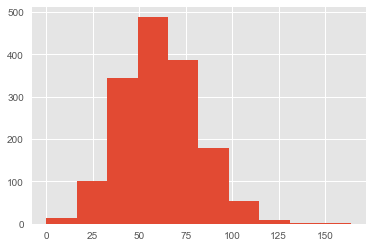

In [62]:
df2.avg_price.hist()

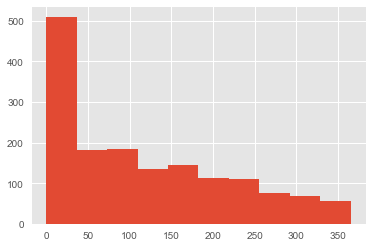

In [63]:
df2.days_since_last_booking.hist()

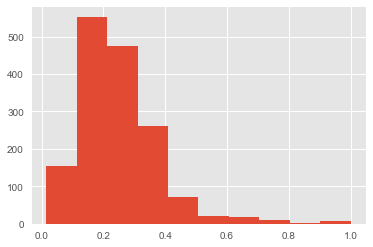

In [64]:
df2.cancellation_rate.hist()

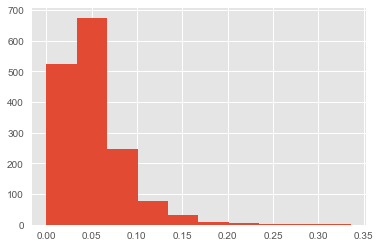

In [65]:
df2.conversion_rate.hist()

In [42]:
normalized_trf = preprocessing.normalize(df2)
normalized_trf = pd.DataFrame(normalized_trf)

normalized_trf.describe()

,0,1,2,3
count,1581.000000,1581.000000,1581.000000,1.581000e+03
mean,0.581072,0.680881,0.003709,6.462523e-04
std,0.306738,0.322541,0.027133,3.326611e-03
min,0.000000,0.000000,0.000045,2.837957e-07
25%,0.296577,0.418011,0.001005,1.885278e-04
50%,0.537010,0.843320,0.001800,3.605126e-04
75%,0.908409,0.954751,0.003254,6.453749e-04
max,0.999999,0.999995,0.975784,1.121611e-01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000199D4CFF240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000199D523FBA8>]], dtype=object)

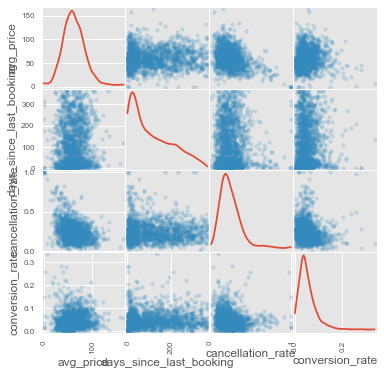

In [43]:
scatter_matrix(df2, alpha=0.2, figsize=(6, 6), diagonal='kde')

Now we begin to build the clusters

In [44]:
K = range(1,10)

# scipy.cluster.vq.kmeans
k_clusters = [kmeans(normalized_trf.values,k) for k in K] # apply kmeans 1 to 10
k_clusters[:3]

[(array([[  5.81072049e-01,   6.80880695e-01,   3.70939669e-03,
            6.46252277e-04]]), 0.40635277779463697),
 (array([[  3.57364371e-01,   9.16914800e-01,   1.86558679e-03,
            3.54412723e-04],
         [  9.17874418e-01,   3.25520315e-01,   6.48533869e-03,
            1.08563037e-03]]), 0.16724657448534727),
 (array([[  7.58385558e-01,   6.31286249e-01,   5.11710718e-03,
            9.89220213e-04],
         [  9.71311343e-01,   1.92516733e-01,   6.67436918e-03,
            9.88547460e-04],
         [  3.12365966e-01,   9.40783020e-01,   1.64099262e-03,
            3.27481656e-04]]), 0.11803244773358683)]

In [45]:
euclidean_centroid = [cdist(normalized_trf.values, centroid, 'euclidean') for (centroid,var) in k_clusters]
print ('-----with 1 cluster------')
print (euclidean_centroid[0][:5])

print ('-----with 2 cluster------')
print (euclidean_centroid[1][:5])

-----with 1 cluster------
[[ 0.18689338]
 [ 0.57972141]
 [ 0.69805598]
 [ 0.33431803]
 [ 0.4974092 ]]
-----with 2 cluster------
[[ 0.17032194  0.6654275 ]
 [ 0.90484502  0.09138212]
 [ 1.02145927  0.22137011]
 [ 0.01612574  0.82377317]
 [ 0.18386366  0.98385379]]


In [46]:
distance = [np.min(D,axis=1) for D in euclidean_centroid]
print ('-----with 1st cluster------')
print (distance[0][:5])
print ('-----with 2nd cluster------')
print (distance[1][:5])

-----with 1st cluster------
[ 0.18689338  0.57972141  0.69805598  0.33431803  0.4974092 ]
-----with 2nd cluster------
[ 0.17032194  0.09138212  0.22137011  0.01612574  0.18386366]


In [47]:
avgWithinSumSquare = [sum(d)/normalized_trf.values.shape[0] for d in distance]
avgWithinSumSquare

[0.40635277779463702,
 0.16737113451563793,
 0.11802658273874114,
 0.087170843111440605,
 0.069879437155415711,
 0.059762467896785701,
 0.051605475323814133,
 0.045875843288202357,
 0.040674261080903822]

As with activities, Transfers also showed that 3 clusters were the most ideal. We used 3 clusters as a starting point. We played around with the different features and number of clusters and found that 3 clusters did produce the best results. Below are our findings.

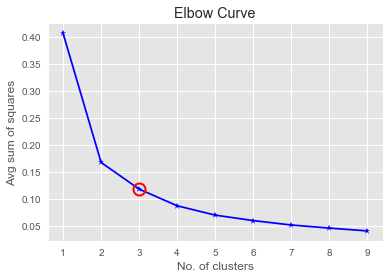

In [48]:
point_id = 2
# plot elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSumSquare, 'b*-')
ax.plot(K[point_id], avgWithinSumSquare[point_id], marker='o', markersize=12, 
      markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('No. of clusters')
plt.ylabel('Avg sum of squares')
tt = plt.title('Elbow Curve')

3 Clusters

In [49]:
km = KMeans(3, init='k-means++', random_state = 3425) # initialize
km.fit(normalized_trf.values)
df2['clientSegment'] = km.predict(normalized_trf.values)
df2[:5]

,avg_price,days_since_last_booking,cancellation_rate,conversion_rate,clientSegment
0,46.447761,77,0.298507,0.020402,1
32,54.333333,14,0.086022,0.036257,0
33,93.055556,11,0.092593,0.051973,0
34,75.879747,196,0.094937,0.045771,1
50,44.964286,238,0.321429,0.034001,1


In [50]:
df2.groupby('clientSegment').count()

,avg_price,days_since_last_booking,cancellation_rate,conversion_rate
clientSegment,,,,
0,409,409,409,409
1,814,814,814,814
2,358,358,358,358


In [51]:
df2.groupby('clientSegment').mean()

,avg_price,days_since_last_booking,cancellation_rate,conversion_rate
clientSegment,,,,
0,66.874472,13.973105,0.241434,0.051782
1,58.339765,197.315725,0.249270,0.053037
2,61.615634,55.446927,0.262805,0.048523


In [52]:
clust_map2 = {
    0:'A',
    1:'B',
    2:'C',
}

df2.clientSegment = df2.clientSegment.map(clust_map2)
df2[:10]


,avg_price,days_since_last_booking,cancellation_rate,conversion_rate,clientSegment
0,46.447761,77,0.298507,0.020402,B
32,54.333333,14,0.086022,0.036257,A
33,93.055556,11,0.092593,0.051973,A
34,75.879747,196,0.094937,0.045771,B
50,44.964286,238,0.321429,0.034001,B
64,57.486111,295,0.375000,0.104803,B
87,72.964286,228,0.160714,0.043277,B
102,71.648148,97,0.203704,0.028213,C
119,69.857143,186,0.158730,0.024648,B
126,57.689189,11,0.283784,0.057926,A


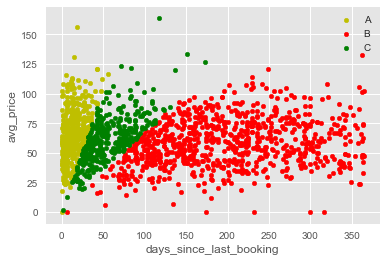

In [53]:
d_color = {
    'A':'y',
    'B':'r',
    'C':'g',
}

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df2[df2.clientSegment == clust].plot(kind='scatter', x='days_since_last_booking', y='avg_price', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

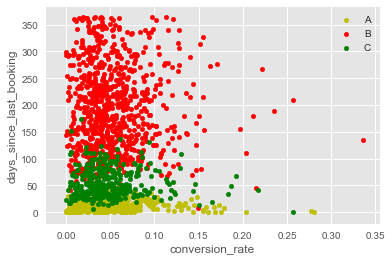

In [54]:
d_color = {
    'A':'y',
    'B':'r',
    'C':'g',
}

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df2[df2.clientSegment == clust].plot(kind='scatter', x='conversion_rate', y='days_since_last_booking', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

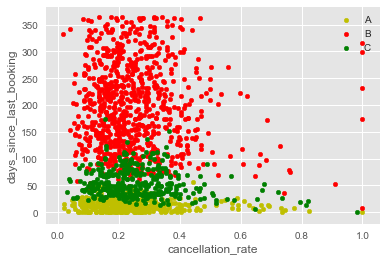

In [56]:
d_color = {
    'A':'y',
    'B':'r',
    'C':'g',
}

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df2[df2.clientSegment == clust].plot(kind='scatter', x='cancellation_rate', y='days_since_last_booking', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

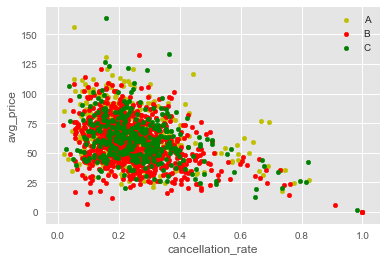

In [58]:
d_color = {
    'A':'y',
    'B':'r',
    'C':'g',
}

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df2[df2.clientSegment == clust].plot(kind='scatter', x='cancellation_rate', y='avg_price', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

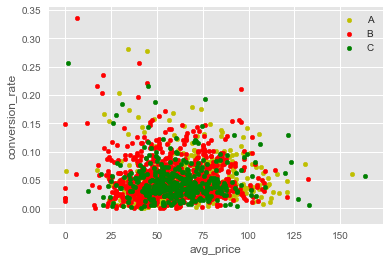

In [59]:
d_color = {
    'A':'y',
    'B':'r',
    'C':'g',
}

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df2[df2.clientSegment == clust].plot(kind='scatter', x='avg_price', y='conversion_rate', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

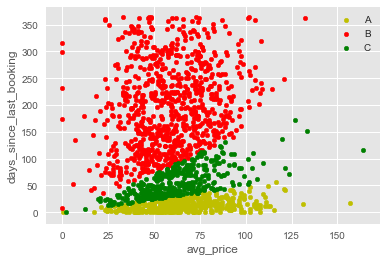

In [60]:
d_color = {
    'A':'y',
    'B':'r',
    'C':'g',
}

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df2[df2.clientSegment == clust].plot(kind='scatter', x='avg_price', y='days_since_last_booking', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

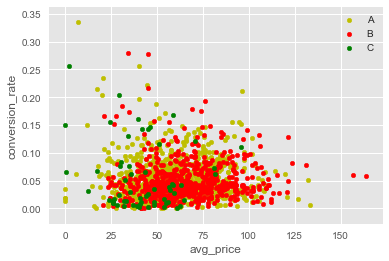

In [444]:
d_color = {
    'A':'y',
    'B':'r',
    'C':'g',
}

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df2[df2.clientSegment == clust].plot(kind='scatter', x='avg_price', y='conversion_rate', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

clientSegment
A    [[Axes(0.125,0.551739;0.336957x0.328261), Axes...
B    [[Axes(0.125,0.551739;0.336957x0.328261), Axes...
C    [[Axes(0.125,0.551739;0.336957x0.328261), Axes...
dtype: object

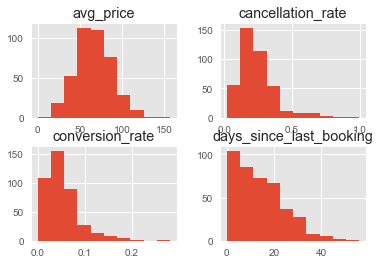

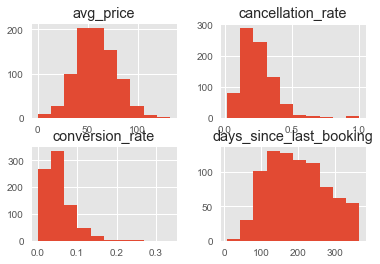

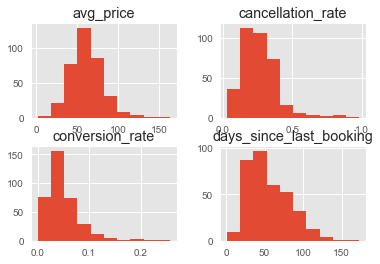

In [61]:
df2.groupby('clientSegment').hist()

# Exploring Active Clients

In [284]:
act_active = pd.read_csv("c:/Users/ceayl/OneDrive/Documents/Term 3/Team D HotelBeds Datathon/activities_data/part1_active.csv", sep="|")
act_active.head()

,client,Avg_Children,Avg_Pct_Comm,Avg_Adults,DateDiff,Total_Bookings,Total_Income,cancellations,countries,Booking_Freq,avg_price,age,days_since_last_booking
0,100056,0.000000,10.000000,2.000000,31.000000,1,55,0,1,1.000000,55.000000,1419,1419
1,100094,0.166667,14.722222,2.444444,62.277778,18,2536,3,5,2.571429,140.888889,3670,564
2,100108,0.230769,14.000000,2.846154,26.461538,10,2809,3,5,1.625000,280.900000,3613,1646
3,100110,0.338843,14.000000,2.049587,36.975207,86,15504,33,10,4.840000,180.279070,3559,982
4,10015,0.461538,0.000000,2.343195,98.994083,144,45183,23,5,5.827586,313.770833,3193,2454


In [285]:
act_active2 = pd.read_csv("c:/Users/ceayl/OneDrive/Documents/Term 3/Team D HotelBeds Datathon/activities_data/part2_active.csv", sep="|")
act_active2.head()

,client,Avg_Children,Avg_Pct_Comm,Avg_Adults,DateDiff,Total_Bookings,Total_Income,cancellations,countries,Booking_Freq,avg_price,age,days_since_last_booking
0,10010,0.162791,11.860465,2.488372,16.000000,43,5735,8,9,2.687500,133.372093,3210,757
1,100192,0.714286,11.980952,2.266667,33.847619,99,8994,26,8,4.565217,90.848485,1498,745
2,100193,0.250000,14.000000,2.194444,45.138889,29,3974,15,5,4.000000,137.034483,3635,697
3,10023,0.445993,0.000000,2.947735,41.480836,227,90003,48,15,10.629630,396.488987,3159,635
4,100238,0.000000,14.000000,2.000000,23.000000,1,620,0,1,1.000000,620.000000,1489,1087


In [286]:
act_active= act_active.append(act_active2)

In [307]:
df3= activities.append(activities2)
df3= df3[df3['Total_Bookings'] >30]
df3['days_since_last_booking'] = df3['days_since_last_booking'] -486
df3=df3[df3.days_since_last_booking<=365]
df3= pd.concat([df.clientSegment, df3], axis=1)
#df3.drop(df3.columns[[2,3,5,6]], axis=1, inplace=True)
act_active=pd.merge(act_active, df3, on='client', how='left')

In [288]:
df3.groupby('clientSegment').count()

,client,Avg_Children,Avg_Pct_Comm,Avg_Adults,DateDiff,Total_Bookings,Total_Income,cancellations,countries,Booking_Freq,avg_price,age,days_since_last_booking,requests
clientSegment,,,,,,,,,,,,,,
A,160,160,160,160,160,160,160,160,160,160,160,160,160,160
B,998,998,998,998,998,998,998,998,998,998,998,998,998,995
C,516,516,516,516,516,516,516,516,516,516,516,516,516,516


In [289]:
act_active.groupby('clientSegment').client.count()

clientSegment
A    155
B    985
C    490
Name: client, dtype: int64

In [290]:
df3.groupby('clientSegment').describe()

Avg_Adults  Avg_Children  Avg_Pct_Comm  Booking_Freq  \
clientSegment                                                               
A             count  160.000000    160.000000    160.000000    160.000000   
              mean     3.058213      0.658392      2.916590     11.099112   
              std      0.808896      0.374787      5.715922     17.105611   
              min      1.591837      0.000000      0.000000      1.956522   
              25%      2.666965      0.418375      0.000000      3.592857   
              50%      2.874107      0.580628      0.000000      5.564909   
              75%      3.206138      0.823276      0.000000     11.281429   
              max      7.403509      2.575758     18.000000    164.866667   
B             count  998.000000    998.000000    998.000000    998.000000   
              mean     2.594302      0.371194      6.906736      6.225958   
              std      0.593785      0.284491      6.164718      9.664665   
              min      1.205556      0.000000      0.000000      1.777778   
              25%      2.266667      0.163636      0.000000      3.000000   
              50%      2.497967      0.322256     11.000000      4.074074   
              75%      2.775445      0.519002     11.985816      6.000000   
              max      9.254902      2.687500     18.256098    185.928571   
C             count  516.000000    516.000000    516.000000    516.000000   
              mean     2.599404      0.415718      8.525020      4.850934   
              std      0.526120      0.319037      5.770114      4.553339   
              min      1.241263      0.000000      0.000000      1.833333   
              25%      2.279767      0.187292      0.000000      2.818182   
              50%      2.501092      0.360507     11.895285      3.627315   
              75%      2.786152      0.579559     12.000000      5.168103   
              max      5.597561      3.093750     18.048913     66.166667   

                       DateDiff  Total_Bookings  Total_Income          age  \
clientSegment                                                                
A             count  160.000000      160.000000  1.600000e+02   160.000000   
              mean    53.723361      192.981250  1.060640e+05  2881.168750   
              std     29.089880      287.578690  1.740285e+05  1194.373251   
              min      8.404255       31.000000  1.079300e+04   683.000000   
              25%     32.290092       42.000000  1.946875e+04  1863.000000   
              50%     48.434087       88.500000  4.141550e+04  2896.000000   
              75%     65.829349      213.250000  1.097730e+05  3879.000000   
              max    163.655629     1965.000000  1.009987e+06  5116.000000   
B             count  998.000000      998.000000  9.980000e+02   998.000000   
              mean    45.128180      103.444890  1.535874e+04  2801.972946   
              std     24.447775      159.897925  2.146871e+04  1248.277141   
              min      5.746154       31.000000  0.000000e+00   621.000000   
              25%     28.733297       43.000000  5.718500e+03  1736.750000   
              50%     39.417989       60.000000  9.026000e+03  2696.500000   
              75%     56.404348      100.000000  1.563000e+04  3892.500000   
              max    228.292683     2597.000000  2.639520e+05  5411.000000   
C             count  516.000000      516.000000  5.160000e+02   516.000000   
              mean    41.619722       77.019380  1.137529e+04  2864.038760   
              std     22.931957       86.071587  1.261651e+04  1235.096277   
              min      1.232558       31.000000  0.000000e+00   680.000000   
              25%     26.489413       39.000000  5.284500e+03  1731.250000   
              50%     35.761806       51.000000  7.821500e+03  2768.000000   
              75%     52.072839       79.000000  1.209625e+04  3872.000000   
              max    177.123711      981.000000  1.187080e+05  5363.

In [291]:
tf_active = pd.read_csv("c:/Users/ceayl/OneDrive/Documents/Term 3/Team D HotelBeds Datathon/transfers_data/part1_active.csv", sep="|")
tf_active.head()

,client,Avg_Children,Avg_Pct_Comm,Avg_Adults,Avg_Price,DateDiff,Total_Bookings,Total_Income,cancellations,countries,Booking_Freq,age,days_since_last_booking
0,100094,0.130435,14.973913,2.269565,46.447761,52.739130,67,3112,20,14,4.791667,3670,564
1,100108,0.222222,14.000000,3.027778,88.409091,33.361111,22,1945,8,6,3.000000,3613,1646
2,100110,0.394737,14.000000,2.424812,51.132867,42.710526,143,7312,41,15,9.500000,3559,982
3,100129,0.000000,12.000000,2.000000,118.000000,10.000000,1,118,0,1,2.000000,3666,1900
4,10015,0.400000,2.703797,2.536709,90.167382,150.496203,233,21009,44,17,13.166667,3193,2454


In [292]:
tf_active2 = pd.read_csv("c:/Users/ceayl/OneDrive/Documents/Term 3/Team D HotelBeds Datathon/transfers_data/part2_active.csv", sep="|")
tf_active2.head()

,client,Avg_Children,Avg_Pct_Comm,Avg_Adults,Avg_Price,DateDiff,Total_Bookings,Total_Income,cancellations,countries,Booking_Freq,age,days_since_last_booking
0,10010,0.432432,11.027027,2.351351,90.826087,20.459459,23,2089,4,11,2.466667,3210,757
1,100148,0.000000,10.000000,6.588235,5.846154,131.117647,13,76,12,5,3.400000,2886,1472
2,100192,0.258824,11.858824,2.717647,57.560000,48.082353,50,2878,11,13,4.047619,1498,745
3,100193,0.302326,14.000000,3.372093,70.160000,45.023256,25,1754,9,11,4.300000,3635,697
4,10023,0.226913,12.627968,2.461741,42.497462,38.353562,197,8372,62,14,54.142857,3159,635


In [293]:
tf_active= tf_active.append(tf_active2)

In [316]:
df4= transfers.append(transfers2)
df4=df4[df4.Total_Bookings>50]
df4['days_since_last_booking'] = df4['days_since_last_booking'] -486
df4= pd.concat([df2.clientSegment, df4], axis=1)
#df4.drop(df4.columns[[3,5,6,11]], axis=1, inplace=True)
tf_active=pd.merge(tf_active, df4, on='client', how='left')

In [317]:
df4.groupby('clientSegment').count()

,client,Avg_Children,Avg_Pct_Comm,Avg_Adults,DateDiff,Total_Bookings,Total_Income,cancellations,countries,Booking_Freq,avg_price,age,days_since_last_booking,requests
clientSegment,,,,,,,,,,,,,,
A,854,854,854,854,854,854,854,854,854,854,854,854,854,851
B,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164,1160
C,607,607,607,607,607,607,607,607,607,607,607,607,607,607


In [318]:
tf_active.groupby('clientSegment').client.count()

clientSegment
A     854
B    1164
C     607
Name: client, dtype: int64

In [319]:
df4.groupby("clientSegment").describe()

Avg_Adults  Avg_Children  Avg_Pct_Comm  Booking_Freq  \
clientSegment                                                                
A             count   854.000000    854.000000    854.000000    854.000000   
              mean      2.554975      0.312963     10.282610     16.453085   
              std       0.426833      0.211773      4.980749     38.254443   
              min       1.006410      0.000000      0.000000      2.695652   
              25%       2.264531      0.151756     10.008621      5.845909   
              50%       2.500000      0.281623     12.000000      8.219807   
              75%       2.777482      0.428571     14.000000     13.819565   
              max       4.716418      1.389381     17.753425    680.076923   
B             count  1164.000000   1164.000000   1164.000000   1164.000000   
              mean      2.604905      0.276349     10.266243     19.479580   
              std       0.368896      0.162070      4.650838     52.522638   
              min       1.433333      0.000000      0.000000      3.181818   
              25%       2.365653      0.161154     11.331969      5.591503   
              50%       2.565983      0.254809     12.000000      7.714286   
              75%       2.778808      0.356350     12.000000     12.781609   
              max       4.759615      1.044643     18.559596    745.500000   
C             count   607.000000    607.000000    607.000000    607.000000   
              mean      2.727586      0.326723     11.374831     10.340904   
              std       0.413548      0.194082      3.552127     16.974975   
              min       1.549020      0.000000      0.000000      3.461538   
              25%       2.451704      0.191139     11.864779      5.078462   
              50%       2.688073      0.304054     12.000000      6.392857   
              75%       2.937700      0.433962     12.000000      9.295330   
              max       5.441667      1.653846     18.550000    292.333333   

                        DateDiff  Total_Bookings   Total_Income          age  \
clientSegment                                                                  
A             count   854.000000      854.000000     854.000000   854.000000   
              mean     54.083986      188.207260    7037.681499  2795.487119   
              std      26.384501      514.462811   16540.029273  1196.088940   
              min       6.275862       51.000000       0.000000   696.000000   
              25%      35.930683       65.000000    2653.250000  1779.750000   
              50%      48.823225       87.000000    3524.000000  2632.500000   
              75%      64.850800      138.750000    5702.500000  3801.750000   
              max     246.599237     9717.000000  252420.000000  5419.000000   
B             count  1164.000000     1164.000000    1164.000000  1164.000000   
              mean     60.230805      274.890893   17467.621134  3019.323024   
              std      25.463179      863.890032   54975.643135  1259.174585   
              min      10.071429       51.000000    2884.000000   645.000000   
              25%      42.787088       67.000000    4439.750000  1894.750000   
              50%      56.152998      102.000000    6540.500000  2927.000000   
              75%      73.723534      169.250000   10972.500000  4127.000000   
              max     192.745763    12462.000000  895227.000000  5386.000000   
C             count   607.000000      607.000000     607.000000   607.000000   
              mean     62.536936      144.904448   12795.626030  3099.130148   
              std      28.941704      291.942132   24265.365330  1350.408298   
              min      16.568345       51.000000    3920.000000   778.000000   
              25%      41.732972       62.000000    5640.500000  1830.500000   
              50%      55.680723       82.000000    7557.000000  2969.000000   
              75%      76.567239      131.500000   11913.500000  4392.500

In [308]:
np.savetxt("c:/Users/ceayl/OneDrive/Documents/Term 3/transfer_clusters.csv", df4, delimiter=",", fmt='%s')
np.savetxt("c:/Users/ceayl/OneDrive/Documents/Term 3/activity_clusters.csv", df3, delimiter=",", fmt='%s')


# Comparing the Activities and Transfers Clients

In [299]:
df4= df4[['client', 'clientSegment']]

In [300]:
df3= df3[['client', 'clientSegment']]

In [301]:
df5= pd.merge(df4, df3, on='client', how='inner')

In [302]:
df5.describe()

,client
count,738.000000
mean,51452.407859
std,36241.883444
min,27.000000
25%,27344.000000
50%,43465.500000
75%,70932.500000
max,196669.000000


In [303]:
df6= pd.merge(df4, df3, on='client', how='outer')
df6.describe(include='all')

,client,clientSegment_x,clientSegment_y
count,3561.000000,2625,1674
unique,NaN,3,3
top,NaN,B,B
freq,NaN,1164,998
mean,55765.266779,NaN,NaN
std,40319.124014,NaN,NaN
min,17.000000,NaN,NaN
25%,28306.000000,NaN,NaN
50%,45501.000000,NaN,NaN
75%,74857.000000,NaN,NaN


In [304]:
df6['equal'] = np.where(df6.clientSegment_x == df6.clientSegment_y, 1, 0)

In [305]:
df6.equal.sum()

310